In [2]:
import pandas as pd

filepath = '/Users/15114/Downloads/epidemiology.csv'
COVID_data = pd.read_csv(filepath)

In [3]:
COVID_data

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12525820,2022-09-09,ZW,11.0,0.0,NaN,NaN,256870.0,5596.0,NaN,NaN
12525821,2022-09-10,ZW,18.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525822,2022-09-11,ZW,0.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525823,2022-09-12,ZW,51.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN


In [27]:
import pandas as pd

filepath = '/Users/15114/Downloads/economy.csv'
economy = pd.read_csv(filepath)
economy

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389
3,AG,1.727759e+09,17790.0,NaN
4,AL,1.527808e+10,5352.0,0.621
...,...,...,...,...
399,WS,8.506550e+08,4315.0,NaN
400,YE,2.759126e+10,968.0,0.369
401,ZA,3.514316e+11,6001.0,0.406
402,ZM,2.306472e+10,1291.0,0.396


In [13]:
country = COVID_data['location_key'].unique()
country

array(['AD', 'AE', 'AF', ..., 'ZA_WC_DC5', 'ZM', 'ZW'], dtype=object)

In [91]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df = pd.read_csv('/Users/15114/Downloads/economy.csv',index_col = 0)
df_data = df.fillna(0)
kmeans = KMeans(n_clusters=10,random_state=1)
kmeans.fit(df_data)
kmeans.labels_
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_data)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
principalDf.index = df_data.index
principalDf['cluster'] = kmeans.labels_

['CN_AH', 'CN_BJ', 'CN_FJ', 'CN_HE', 'CN_HN', 'CN_SH', 'DE']

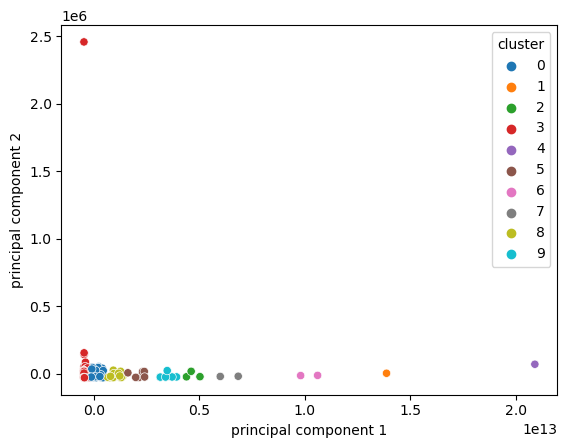

In [214]:
#与经济相关的数据作图
import seaborn as sns
sns.scatterplot(data=principalDf,x='principal component 1',y='principal component 2',hue='cluster',palette='tab10')
fig.savefig('/Users/15114/Downloads/economy_cluster.png',dpi=400,facecolor='white',bbox_inches='tight')

In [73]:
import pandas as pd

filepath = '/Users/15114/Downloads/health.csv'
health_data = pd.read_csv(filepath)
health_data

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,WS,73.187,27.7,9.2,13.6,138.239,80.735,85.0,20.6,NaN,2.4885,0.3445,233.065063,27.634661
3500,YE,66.096,18.4,5.4,42.9,219.749,174.558,194.2,30.6,NaN,0.7852,NaN,72.039467,58.321163
3501,ZA,63.857,20.3,12.7,28.5,376.404,248.816,86.7,26.2,NaN,1.3078,0.9054,499.237549,38.775391
3502,ZM,63.510,13.8,4.5,40.4,321.143,221.573,127.2,17.9,NaN,1.3376,1.1867,67.648666,8.015779


In [192]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df = pd.read_csv('/Users/15114/Downloads/health.csv',index_col = 0)
df_data = df.fillna(0).iloc[:,[0,1,2,3,4,5,6,7]]
kmeans = KMeans(n_clusters=10,random_state=1)
kmeans.fit(df_data)
kmeans.labels_
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_data)
principalDf2 = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
principalDf2.index = df_data.index
principalDf2['cluster'] = kmeans.labels_
principalDf2

,principal component 1,principal component 2,cluster
location_key,,,
AD,-8.732201,5.461866,0
AE,86.999858,11.194061,5
AF,354.843596,77.233061,1
AG,139.059222,-32.846613,2
AL,112.206171,10.742831,5
...,...,...,...
WS,169.649582,5.892172,2
YE,325.710485,68.434290,8
ZA,437.755730,-96.728379,6


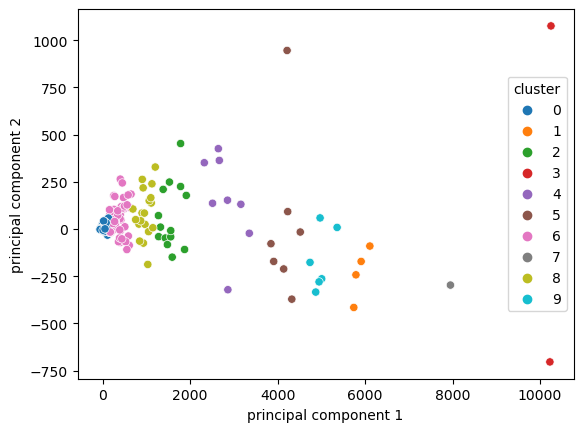

In [215]:
#health与死亡率相关的数据作图
import seaborn as sns
sns.scatterplot(data=principalDf2,x='principal component 1',y='principal component 2',hue='cluster',palette='tab10')
fig.savefig('/Users/15114/Downloads/health_death_cluster.png',dpi=400,facecolor='white',bbox_inches='tight')

In [197]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df = pd.read_csv('/Users/15114/Downloads/health.csv',index_col = 0)
df_data = df.fillna(0).iloc[:,[8,9,10,11,12]]
kmeans = KMeans(n_clusters=10,random_state=1)
kmeans.fit(df_data)
kmeans.labels_
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_data)
principalDf3 = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
principalDf3.index = df_data.index
principalDf3['cluster'] = kmeans.labels_
principalDf3

,principal component 1,principal component 2,cluster
location_key,,,
AD,4216.845369,945.808898,5
AE,1322.287533,10.441418,2
AF,16.389787,36.194787,0
AG,646.292425,111.177974,6
AL,-58.619633,-1.806530,0
...,...,...,...
WS,175.657377,-15.790096,6
YE,22.582894,42.860532,0
ZA,439.607761,-51.853508,6


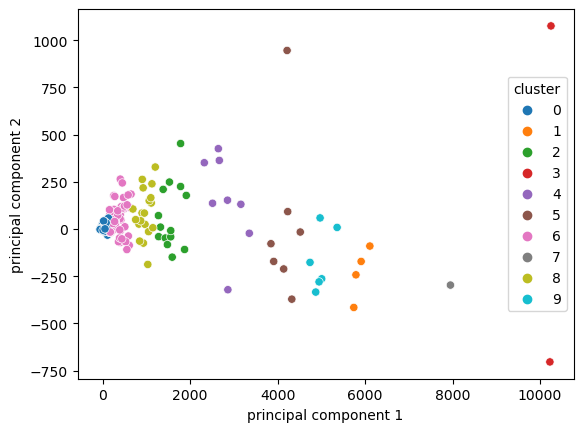

In [216]:
#health与医疗条件相关的数据作图
import seaborn as sns
sns.scatterplot(data=principalDf3,x='principal component 1',y='principal component 2',hue='cluster',palette='tab10')
fig.savefig('/Users/15114/Downloads/health_hospital_cluster.png',dpi=400,facecolor='white',bbox_inches='tight')

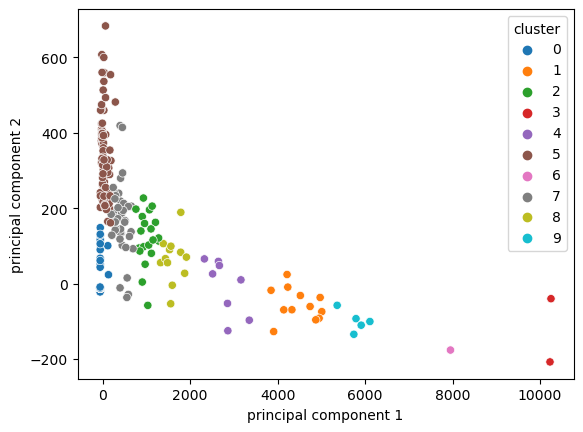

In [217]:
#health所有列的数据作图
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df = pd.read_csv('/Users/15114/Downloads/health.csv',index_col = 0)
df_data = df.fillna(0)
kmeans = KMeans(n_clusters=10,random_state=1)
kmeans.fit(df_data)
kmeans.labels_
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_data)
principalDf4 = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
principalDf4.index = df_data.index
principalDf4['cluster'] = kmeans.labels_
principalDf4

import seaborn as sns
sns.scatterplot(data=principalDf4,x='principal component 1',y='principal component 2',hue='cluster',palette='tab10')
fig.savefig('/Users/15114/Downloads/health_all_cluster.png',dpi=400,facecolor='white',bbox_inches='tight')

In [146]:
#取economy中的cluster8作图
y3 = COVID_data[COVID_data['location_key'] == 'AU'].tail(1)
cluster8_country = principalDf[principalDf['cluster'] == 8].index.tolist()
for index in cluster8_country[1:]:
    y3 = pd.concat([y3,COVID_data[COVID_data['location_key'] == index].tail(1)])  

In [169]:
y3['death_rate'] = (y3['cumulative_deceased'] / y3['cumulative_confirmed'])*100
y3

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,death_rate
486973,2022-09-16,AU,19737.0,135.0,0.0,7262.0,10144497.0,14610.0,0.0,78646425.0,0.144019
574645,2022-09-15,BR,9931.0,82.0,9607.0,NaN,34568833.0,685203.0,33706231.0,NaN,1.982141
5671991,2022-09-13,CA,0.0,0.0,NaN,NaN,4197701.0,44347.0,NaN,NaN,1.056459
5901528,2022-09-15,CN_HL,0.0,0.0,17.0,NaN,3228.0,13.0,3156.0,NaN,0.402726
5902134,2022-09-14,CN_JL,0.0,0.0,0.0,NaN,40329.0,5.0,40289.0,NaN,0.012398
5903861,2022-09-15,CN_NM,7.0,0.0,11.0,NaN,2731.0,1.0,2418.0,NaN,0.036617
5907105,2022-09-15,CN_SX,0.0,0.0,1.0,NaN,469.0,0.0,459.0,NaN,0.000000
5907925,2022-09-16,CN_XJ,0.0,0.0,0.0,NaN,1161.0,3.0,1144.0,NaN,0.258398
6607629,2022-09-14,ES,0.0,0.0,NaN,NaN,13374116.0,113279.0,NaN,NaN,0.847002
7258241,2022-09-15,ID,2651.0,21.0,3915.0,NaN,6402686.0,157849.0,6215711.0,NaN,2.465356


In [170]:
x3 = economy[economy['location_key'] == 'AU']
z3 = y3.iloc[:,[1,6,10]]
cluster8_country = principalDf[principalDf['cluster'] == 8].index.tolist()
for index in cluster8_country[1:]:
    x3 = pd.concat([x3,economy[economy['location_key'] == index]])
m3 = pd.merge(x3,z3,how='inner',on='location_key')
m3

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,cumulative_confirmed,death_rate
0,AU,1.392681e+12,54907.0,0.803,10144497.0,0.144019
1,BR,1.839758e+12,8717.0,0.560,34568833.0,1.982141
2,CA,1.736426e+12,46194.0,0.799,4197701.0,1.056459
3,CN_HL,1.369850e+12,NaN,NaN,3228.0,0.402726
4,CN_JL,1.231130e+12,NaN,NaN,40329.0,0.012398
5,CN_NM,1.735980e+12,NaN,NaN,2731.0,0.036617
6,CN_SX,1.765190e+12,NaN,NaN,469.0,0.000000
7,CN_XJ,1.379760e+12,NaN,NaN,1161.0,0.258398
8,ES,1.418588e+12,30326.0,0.743,13374116.0,0.847002
9,ID,1.119191e+12,4135.0,0.535,6402686.0,2.465356


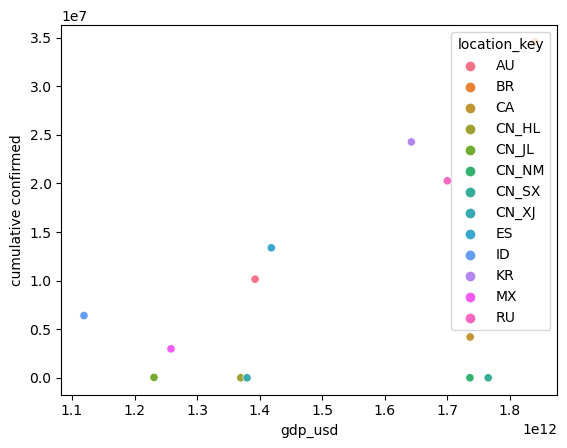

In [218]:
#取economy中的cluster8作图，GDP与患病总人数
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
sns.scatterplot(data = m3, x = 'gdp_usd', y = 'cumulative_confirmed',hue = 'location_key')
axes.set_xlabel('gdp_usd')
axes.set_ylabel('cumulative confirmed')
fig.savefig('/Users/15114/Downloads/economy_cluster8.png',dpi=400,facecolor='white',bbox_inches='tight')

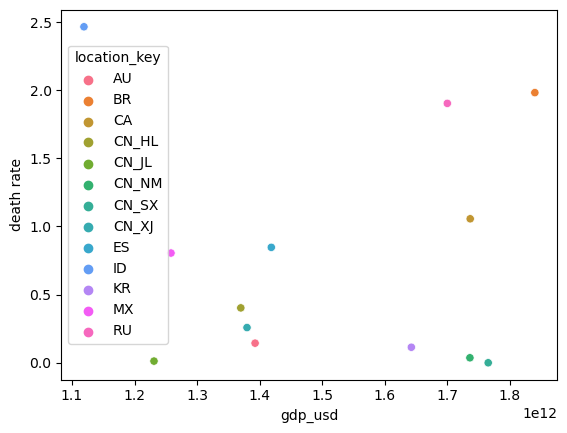

In [219]:
#取economy中的cluster8作图,GDP与死亡率
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
sns.scatterplot(data = m3, x = 'gdp_usd', y = 'death_rate',hue = 'location_key')
axes.set_xlabel('gdp_usd')
axes.set_ylabel('death rate')
fig.savefig('/Users/15114/Downloads/economy_cluster8(2).png',dpi=400,facecolor='white',bbox_inches='tight')

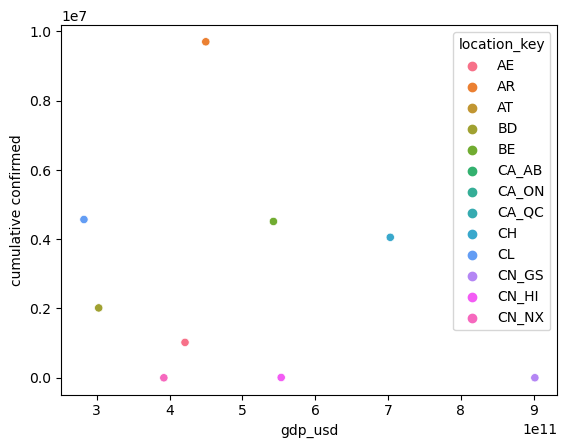

In [220]:
#取economy中的cluster0作图，GDP与患病总人数
cluster0_country = principalDf[principalDf['cluster'] == 0][:13].index.tolist()

y4 = COVID_data[COVID_data['location_key'] == 'AE'].tail(1)
for index in cluster0_country[1:]:
    y4 = pd.concat([y4,COVID_data[COVID_data['location_key'] == index].tail(1)])  
y4['death_rate'] = (y4['cumulative_deceased'] / y4['cumulative_confirmed'])*100
z4 = y4.iloc[:,[1,6,10]]

x4 = economy[economy['location_key'] == 'AE']
for index in cluster0_country[1:]:
    x4 = pd.concat([x4,economy[economy['location_key'] == index]])
m4 = pd.merge(x4,z4,how='inner',on='location_key')

import matplotlib.pyplot as plt
fig,axes = plt.subplots()
sns.scatterplot(data = m4, x = 'gdp_usd', y = 'cumulative_confirmed',hue = 'location_key')
axes.set_xlabel('gdp_usd')
axes.set_ylabel('cumulative confirmed')
fig.savefig('/Users/15114/Downloads/economy_cluster0.png',dpi=400,facecolor='white',bbox_inches='tight')

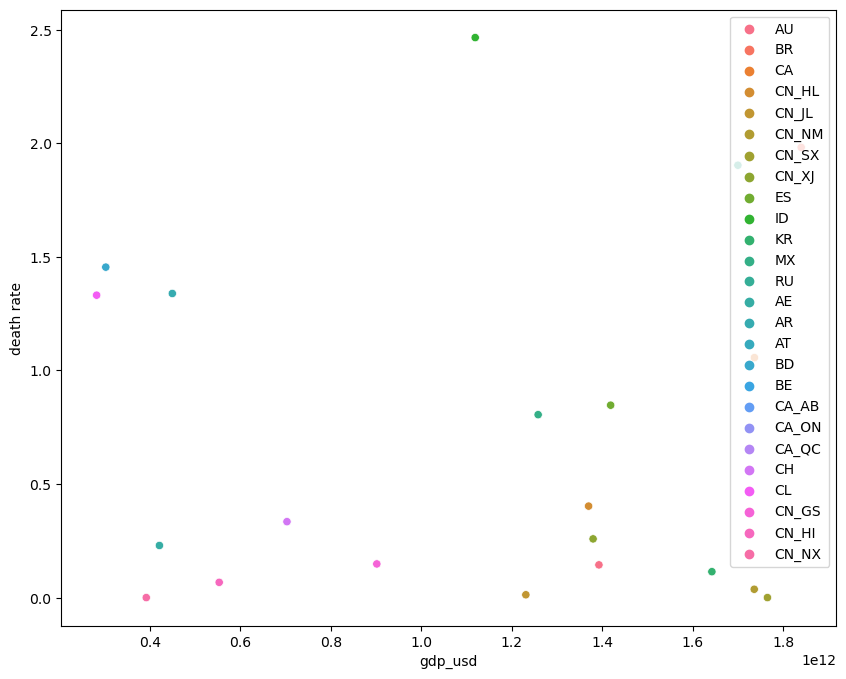

In [221]:
#取economy中的cluster0和cluster8作图，GDP与死亡率
m5 = pd.concat([m3,m4],axis = 0)
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(10,8))
sns.scatterplot(data = m5, x = 'gdp_usd', y = 'death_rate',hue = 'location_key')
axes.set_xlabel('gdp_usd')
axes.set_ylabel('death rate')
plt.legend(loc = 'upper right')
fig.savefig('/Users/15114/Downloads/economy_cluster0&8.png',dpi=400,facecolor='white',bbox_inches='tight')

In [204]:
#取health中的cluster8作图
health = pd.read_csv('/Users/15114/Downloads/health.csv')

y5 = COVID_data[COVID_data['location_key'] == 'AE'].tail(1)
cluster8_country2 = principalDf4[principalDf4['cluster'] == 8].index.tolist()
for index in cluster8_country2[1:]:
    y5 = pd.concat([y5,COVID_data[COVID_data['location_key'] == index].tail(1)]) 
y5['death_rate'] = (y5['cumulative_deceased'] / y5['cumulative_confirmed'])*100

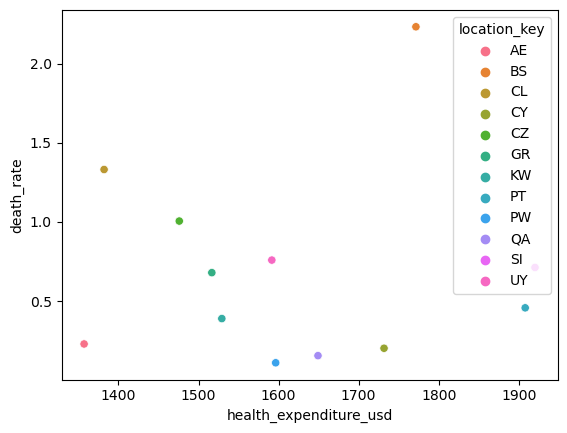

In [222]:
#取health中的cluster8作图，人均医疗支出与死亡率
x5 = health[health['location_key'] == 'AE']
z5 = y5.iloc[:,[1,6,10]]
for index in cluster8_country2[1:]:
    x5 = pd.concat([x5,health[health['location_key'] == index]])
m6 = pd.merge(x5,z5,how='inner',on='location_key')

import matplotlib.pyplot as plt
fig,axes = plt.subplots()
sns.scatterplot(data = m6, x = 'health_expenditure_usd', y = 'death_rate',hue = 'location_key')
axes.set_xlabel('health_expenditure_usd')
axes.set_ylabel('death_rate')
fig.savefig('/Users/15114/Downloads/health_cluster8.png',dpi=400,facecolor='white',bbox_inches='tight')